In [19]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [20]:
iris = load_iris()

X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [21]:
df = df[df['target']!=0][['sepal width (cm)', 'petal length (cm)', 'target']]
df

,sepal width (cm),petal length (cm),target
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1
...,...,...,...
145,3.0,5.2,2
146,2.5,5.0,2
147,3.0,5.2,2
148,3.4,5.4,2


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

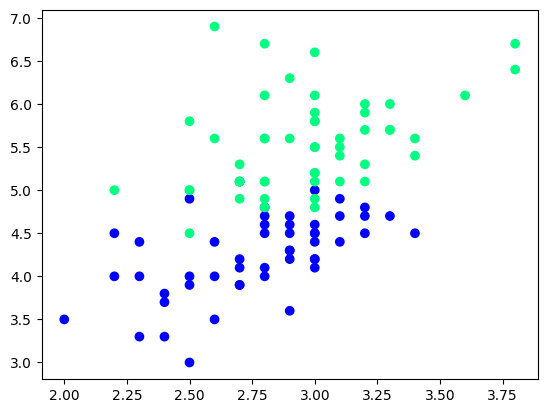

In [24]:
plt.scatter(df['sepal width (cm)'], df['petal length (cm)'], c=df['target'], cmap='winter')

In [25]:
df = df.sample(100)
df_train = df.iloc[:60, :].sample(10)
df_val = df.iloc[60:80, :].sample(5)
df_test = df.iloc[80:, :].sample(5)

In [26]:
df_train

,sepal width (cm),petal length (cm),target
129,3.0,5.8,2
137,3.1,5.5,2
116,3.0,5.5,2
82,2.7,3.9,1
58,2.9,4.6,1
131,3.8,6.4,2
124,3.3,5.7,2
75,3.0,4.4,1
64,2.9,3.6,1
101,2.7,5.1,2


In [27]:
X_test = df_val.iloc[:, 0:2].values
y_test = df_val.iloc[:, -1].values

## Case - 1 Bagging

In [29]:
df_bag = df_train.sample(8, replace=True)

X = df_bag.iloc[:, 0:2].values
y = df_bag.iloc[:, -1].values
df_bag

,sepal width (cm),petal length (cm),target
131,3.8,6.4,2
58,2.9,4.6,1
58,2.9,4.6,1
137,3.1,5.5,2
131,3.8,6.4,2
101,2.7,5.1,2
82,2.7,3.9,1
129,3.0,5.8,2


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [39]:
def evaluate(clf, X, y):
    clf.fit(X, y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X, y, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test, y_pred))

In [40]:
dt_bag1 = DecisionTreeClassifier()

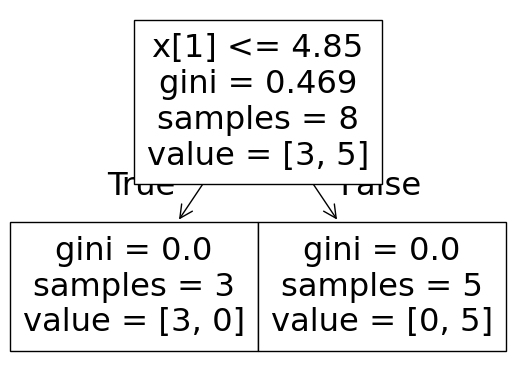

1.0


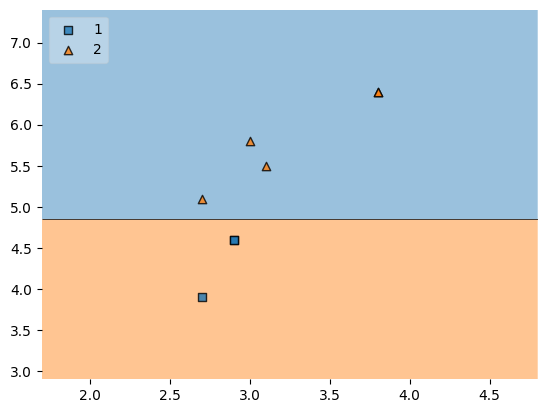

In [41]:
evaluate(dt_bag1, X, y)

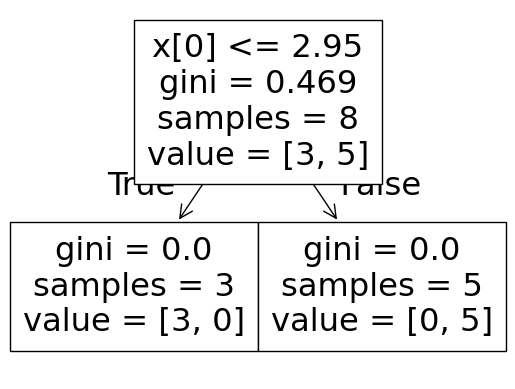

0.8


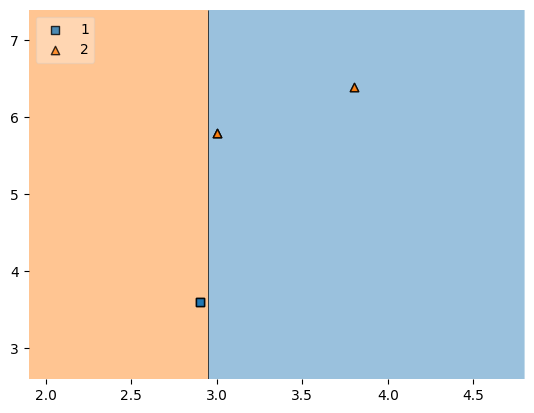

In [42]:
df_bag = df_train.sample(8, replace=True)
X = df_bag.iloc[:, 0:2].values
y = df_bag.iloc[:, -1].values

dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2, X, y)

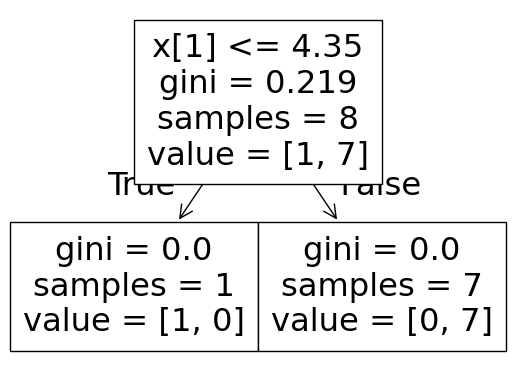

0.8


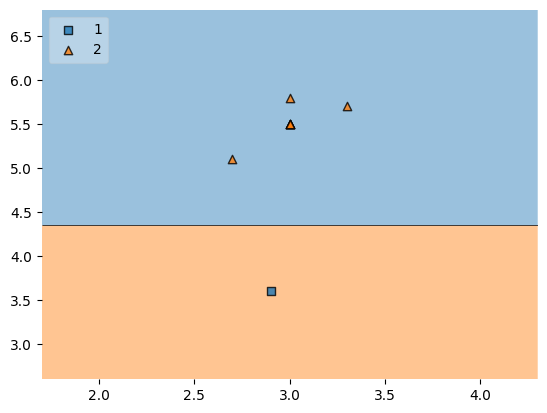

In [43]:
df_bag = df_train.sample(8, replace=True)
X = df_bag.iloc[:, 0:2].values
y = df_bag.iloc[:, -1].values

dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3, X, y)

## Predict

In [44]:
df_test

,sepal width (cm),petal length (cm),target
84,3.0,4.5,1
83,2.7,5.1,1
57,2.4,3.3,1
78,2.9,4.5,1
140,3.1,5.6,2


In [47]:
print("Predictor 1 ", dt_bag1.predict(np.array([3.1, 5.6]).reshape(1, 2)))
print("Predictor 2 ", dt_bag2.predict(np.array([3.1, 5.6]).reshape(1, 2)))
print("Predictor 3 ", dt_bag3.predict(np.array([3.1, 5.6]).reshape(1, 2)))

Predictor 1  [2]
Predictor 2  [2]
Predictor 3  [2]
